# Loading/Rescaling Image Data

## Perform standard imports

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from PIL import Image
from IPython.display import display

## Create a DataFrame

#### Create a list of image filenames

#### Create a DataFrame of image sizes (width x height)
It's worth noting that <tt>Image.open()</tt> doesn't read the entire image into memory, so it's a reasonable way to get image sizes. Still, this can take awhile.

In [14]:
path = './Datasets/BSD500_COCO1000_train_val/train/'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+img)
        
print('Images: ',len(img_names))

Images:  1200


In [16]:
# Start by creating a list
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
        
print(f'Images:  {len(img_sizes)}')
print(f'Rejects: {len(rejected)}')

Images:  1200
Rejects: 0


In [17]:
# Convert the list to a DataFrame
df = pd.DataFrame(img_sizes)

# Run summary statistics on image widths
df[0].describe()

count    1200.000000
mean      554.449167
std       104.779091
min       319.000000
25%       481.000000
50%       640.000000
75%       640.000000
max       640.000000
Name: 0, dtype: float64

In [18]:
# Run summary statistics on image heights
df[1].describe()

count    1200.000000
mean      466.945000
std       100.312258
min       256.000000
25%       425.000000
50%       480.000000
75%       486.250000
max       640.000000
Name: 1, dtype: float64

## Image Pre-processing
Transformation of one image

In [24]:
surf = Image.open(img_names[12])
print(surf)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=427x640 at 0x11DA94B10>


In [25]:
r, g, b = surf.getpixel((0, 0))
print(r,g,b)

121 117 108


torch.Size([3, 640, 427])


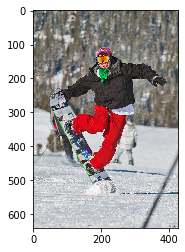

In [26]:
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(surf)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

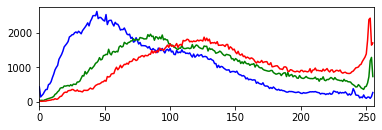

In [29]:
color = ('b','g','r')
for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img = cv.imread(folder+img,cv.IMREAD_COLOR)
        

plt.subplot(2,1,2)
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [34]:
print(histr.squeeze())


[  19.   11.    8.   14.   13.   14.   28.   33.   40.   45.   60.   58.
   85.   69.   73.  110.  150.  159.  214.  261.  276.  269.  316.  324.
  328.  355.  349.  317.  308.  341.  301.  307.  293.  284.  331.  329.
  327.  329.  362.  395.  373.  369.  424.  471.  490.  512.  517.  541.
  574.  581.  620.  595.  732.  719.  731.  804.  818.  822.  934. 1005.
  931.  980. 1062.  991. 1044. 1090. 1086. 1124. 1094. 1171. 1169. 1186.
 1251. 1235. 1201. 1222. 1297. 1301. 1334. 1345. 1309. 1354. 1343. 1344.
 1389. 1384. 1491. 1418. 1476. 1430. 1490. 1452. 1566. 1524. 1534. 1493.
 1554. 1598. 1653. 1587. 1688. 1620. 1638. 1605. 1636. 1698. 1585. 1653.
 1672. 1641. 1790. 1774. 1787. 1824. 1811. 1749. 1766. 1747. 1775. 1757.
 1768. 1801. 1775. 1797. 1791. 1771. 1885. 1782. 1855. 1778. 1826. 1698.
 1726. 1715. 1730. 1695. 1753. 1645. 1651. 1647. 1661. 1646. 1612. 1671.
 1671. 1534. 1603. 1573. 1512. 1535. 1450. 1400. 1471. 1377. 1360. 1395.
 1318. 1332. 1273. 1302. 1281. 1248. 1279. 1263. 12

## Conclusion